## Pasaulinė šokolado pardavimų analizė (2022 m. 01 03 – 08 31)  
## / Global Chocolate Sales Analysis (January 3 – August 31, 2022)

### Baigiamasis darbas | Atliko: Jovita Veinšreider | 2025 06 20 / Final project | Completed by Jovita Veinšreider | June 20, 2025

Baigiamajame darbe analizuojami pasauliniai šokolado pardavimų duomenys (2022-01-03 – 2022-08-31).  
Atliekant analizę siekiama nustatyti veiksnius, darančius įtaką šokolado pardavimams, identifikuoti potencialias naujas rinkas ir prognozuoti galimą pelną.  

/ The final project analyzes global chocolate sales data from January 3 to August 31, 2022.  
The aim of the analysis is to identify the factors influencing chocolate sales, pinpoint potential new markets, and forecast possible profit.

### Bibliotekų suimportavimas / Importing Libraries

In [1]:
# Duomenų užsikrovimui ir skaidymui
import pandas as pd

# Skaičiavimams atlikti
import numpy as np
import statsmodels.api as sm

# Vizualizacijoms
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Duomenų bazės užkrovimas / Database loading

In [ ]:
df = pd.read_csv(r"C:\Users\Grete\Documents\PYTHON\BAIGIAMASIS_DARBAS\Chocolate_Sales.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


### Duomenų paruošimas, tipų keitimas / Data preparation, type conversion

Dviejų stulpelių (Date ir Amount) yra neteisingai nurodyta data type. Prieš konvertuojant į teisingus duomenų tipus, pasitikrinau, kaip pateikiamos yra jų reikšmės. 
 
/ The data types of two columns (Date and Amount) were incorrectly specified. Before converting them to the correct data types, I checked how their values were presented.

In [ ]:
print(df['Date'].head())
print(df['Amount'].head())

0    04-Jan-22
1    01-Aug-22
2    07-Jul-22
3    27-Apr-22
4    24-Feb-22
Name: Date, dtype: object
0     $5,320 
1     $7,896 
2     $4,501 
3    $12,726 
4    $13,685 
Name: Amount, dtype: object


Konvertavau Date duomenų tipą į datetime. / I converted the data type of the Date column to datetime.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

Konvertavau Amount duomenų tipa į float. Panaikinau valiutos simbolį. / I converted the data type of the Amount column to float after removing the currency symbol.

In [ ]:
df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True)
df['Amount'] = df['Amount'].astype(float).round(2)

Patikrinau, ar po konvertavimo rodo teisingą data formatą. / I checked if the date format is correct after conversion.

In [ ]:
print(df.dtypes)

Sales Person             object
Country                  object
Product                  object
Date             datetime64[ns]
Amount                  float64
Boxes Shipped             int64
dtype: object


Susipažinau su duomenų rinkino santrauka. / I reviewed the dataset summary.

In [ ]:
df.info

<bound method DataFrame.info of           Sales Person    Country              Product       Date   Amount  \
0       Jehu Rudeforth         UK      Mint Chip Choco 2022-01-04   5320.0   
1          Van Tuxwell      India        85% Dark Bars 2022-08-01   7896.0   
2         Gigi Bohling      India  Peanut Butter Cubes 2022-07-07   4501.0   
3         Jan Morforth  Australia  Peanut Butter Cubes 2022-04-27  12726.0   
4       Jehu Rudeforth         UK  Peanut Butter Cubes 2022-02-24  13685.0   
...                ...        ...                  ...        ...      ...   
1089  Karlen McCaffrey  Australia  Spicy Special Slims 2022-05-17   4410.0   
1090    Jehu Rudeforth        USA           White Choc 2022-06-07   6559.0   
1091      Ches Bonnell     Canada  Organic Choco Syrup 2022-07-26    574.0   
1092    Dotty Strutley      India              Eclairs 2022-07-28   2086.0   
1093  Karlen McCaffrey      India       70% Dark Bites 2022-05-23   5075.0   

      Boxes Shipped  
0        

Sutikrinau kokios yra unikalios skaičių reikšmės kiekviename stulpelyje. / I checked the unique numeric values in each column.

In [ ]:
df.nunique()


Sales Person      25
Country            6
Product           22
Date             168
Amount           827
Boxes Shipped    385
dtype: int64

Susipažinau su visa lentele: kiek (6 columns) ir kokie (Sales Person, Country, Product, Date, Amount, Boxes Shipped) yra stulpeliai, kiek yra eilučių (1094).  

/ I reviewed the entire table: there are 6 columns — Sales Person, Country, Product, Date, Amount, and Boxes Shipped — and a total of 1094 rows.

In [ ]:
df

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184
...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,2022-05-17,4410.0,323
1090,Jehu Rudeforth,USA,White Choc,2022-06-07,6559.0,119
1091,Ches Bonnell,Canada,Organic Choco Syrup,2022-07-26,574.0,217
1092,Dotty Strutley,India,Eclairs,2022-07-28,2086.0,384


Susipžinau su skaitinių stulpelių ("Date", "Amount", "Boxes Shipped") santrauka.  

/ I reviewed the summary statistics of the numerical columns (Date, Amount, Boxes Shipped).

In [ ]:
df.describe()

,Date,Amount,Boxes Shipped
count,1094,1094.000000,1094.000000
mean,2022-05-03 09:04:56.160877568,5652.308044,161.797989
min,2022-01-03 00:00:00,7.000000,1.000000
25%,2022-03-02 00:00:00,2390.500000,70.000000
50%,2022-05-11 00:00:00,4868.500000,135.000000
75%,2022-07-04 00:00:00,8027.250000,228.750000
max,2022-08-31 00:00:00,22050.000000,709.000000
std,NaN,4102.442014,121.544145


Sutikrinau, kokie produktai yra populiariausi. Dažniausiai perkami yra "50% Dark Bites" ir "Eclairs" (po 60 vnt.).  
Taip pat yra populiarūs "Smooth Sliky Salty" (59 vnt.) ir "White Choc" (58 vnt.).  

/ I checked which products are the most popular. The most frequently purchased are "50% Dark Bites" and "Eclairs" (60 units each).  
Also popular are "Smooth Silky Salty" (59 units) and "White Choc" (58 units).

In [ ]:
df.value_counts('Product')

Product
50% Dark Bites          60
Eclairs                 60
Smooth Sliky Salty      59
White Choc              58
Drinking Coco           56
Spicy Special Slims     54
Organic Choco Syrup     52
85% Dark Bars           50
Fruit & Nut Bars        50
After Nines             50
Peanut Butter Cubes     49
Milk Bars               49
99% Dark & Pure         49
Almond Choco            48
Raspberry Choco         48
Orange Choco            47
Mint Chip Choco         45
Manuka Honey Choco      45
Caramel Stuffed Bars    43
70% Dark Bites          42
Baker's Choco Chips     41
Choco Coated Almonds    39
Name: count, dtype: int64

### Porinių grafikų matrica / Pair plot matrix

Parengiau produktų vizualizaciją (naudojau hue), kuri man parodė klasterius, tendencijas, kaip kintamieji yra susiję ir pan.  

/ I created a product visualization (using hue) that showed me clusters, trends, and how variables are related, among other insights.

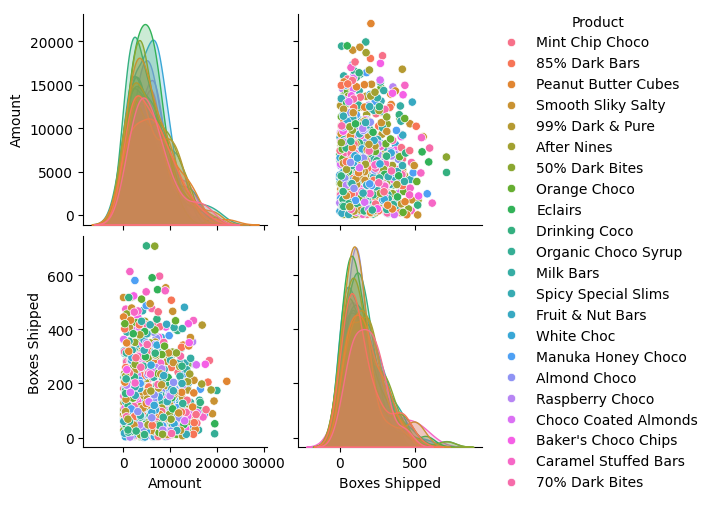

In [ ]:
sns.pairplot(df, hue='Product')

Sužinojau, kiek iš viso buvo pristatyta dėžių ("Boxes Shipped").  

/ I found out the total number of boxes shipped.

In [ ]:
total_boxes = df['Boxes Shipped'].sum()
print(total_boxes)

177007


Sužinojau, už kiek buvo parduota prekių.  

/ I found out the total sales amount for the products.

In [ ]:
total_amount = df['Amount'].sum()
print(total_amount)

6183625.0


Gauti rezultatai rodo, kad:  
1. Daugiausia pardavimų 2022 metais buvo atlikta nuo $1 iki $15 000. Keli pardavimai (nutolę taškai) buvo atlikti $20 000, vienas buvo daugiau kaip $20 000 (200 dėžių).  
2. Buvo parduota prekių už $6 183 625.0, įvykdyti 1094 užsakymai, kurių metu buvo pristatyti 177 007 vnt. dėžių. Daugiausia su tokiais produktais kaip "50% Dark Bites" (60 vnt.), "Eclairs" (60 vnt.), "Smooth Sliky Salty" (59 vnt.), "White Choc" (58 vnt.), "Drinking Coco" (56 vnt.), "Spicy Special Slims" (54 vnt.), "Organic Choco Syrup" (52 vnt.) ir kt.  

/ The results show that:

1. Most sales in 2022 were between $1 and $15,000. A few sales (outliers) reached $20,000, with one exceeding $20,000 (200 boxes).  
2. Products worth $6,183,625.0 were sold, with 1,094 orders fulfilled, delivering a total of 177,007 boxes. The most popular products included "50% Dark Bites" (60 units), "Eclairs" (60 units), "Smooth Silky Salty" (59 units), "White Choc" (58 units), "Drinking Coco" (56 units), "Spicy Special Slims" (54 units), "Organic Choco Syrup" (52 units), and others.

In [ ]:
df['Boxes Shipped'].describe()

count    1094.000000
mean      161.797989
std       121.544145
min         1.000000
25%        70.000000
50%       135.000000
75%       228.750000
max       709.000000
Name: Boxes Shipped, dtype: float64

Iš dėžių aprašymo, matau, kad dauguma užsakymų (50 %) – svyruoja tarp 1 (min) ir 135 dėžių (50%).  
25 % stambiausių užsakymų turi 229 (75%) - 709 (max) dėžių.  
Didelis standartinis nuokrypis (std: 121) rodo, kad dėžių kiekis labai skiriasi tarp įrašų.  
Yra išskirtinių, labai didelių užsakymų gana nemažai, nes max = 709, o vidurkis (mean) tik ~162.  

/ Based on the box shipment data, I observed that 50% of the orders fall between 1 (min) and 135 boxes (50th percentile).  
The top 25% of the largest orders range from 229 (75th percentile) to 709 boxes (max).  
A high standard deviation (std: 121) indicates that the number of boxes varies greatly between records.  
There are quite a few exceptionally large orders, as the maximum is 709 boxes, while the average (mean) is only around 162.

Išsiaiškinau TOP5 pardavėjus, kuriems pavyko daugiausiai parduoti šokolado.  

/ I identified the top 5 sellers who achieved the highest chocolate sales.

In [ ]:
top5 = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False).head(5)
print(top5)
					

Sales Person
Ches Bonnell       320901.0
Oby Sorrel         316645.0
Madelene Upcott    316099.0
Brien Boise        312816.0
Kelci Walkden      311710.0
Name: Amount, dtype: float64


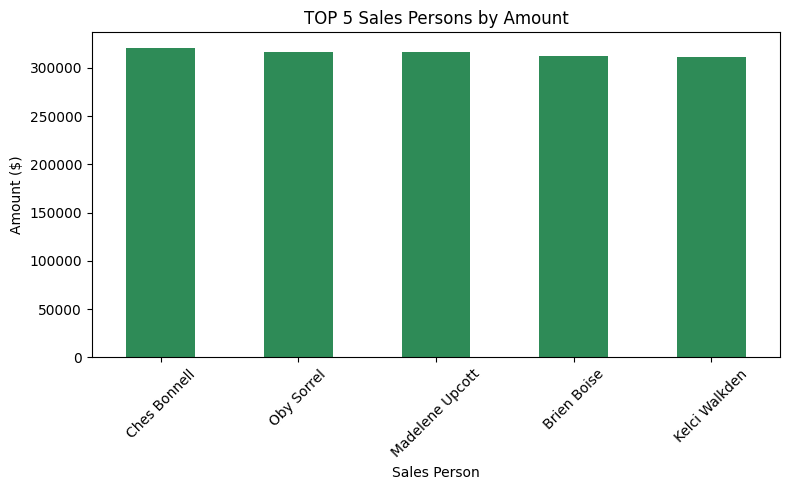

In [26]:
top5.plot(kind='bar', color='seagreen', figsize=(8,5), title='TOP 5 Sales Persons by Amount')
plt.ylabel('Amount ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Išsiaiškinau TOP5 pardavėjus, kuriems sekėsi sunkiausiai prekiauti.  

/ I identified the bottom 5 sellers who had the most difficulty selling chocolate.

In [ ]:
worst = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=True).head(5)
print(worst)

Sales Person
Wilone O'Kielt    138523.0
Dotty Strutley    190624.0
Camilla Castle    196616.0
Mallorie Waber    200592.0
Andria Kimpton    201747.0
Name: Amount, dtype: float64


### Linijinė regresija / Linear Regression

Siekiau išsiaiškinti pardavimo efektyvumą per logistikos mastą.  Apskaičiavau, ar didėjant dėžių skaičiui auga pardavimo suma.  
Atlikau linijinę regresiją tarp dėžių kiekio (Boxes Shipped) ir pardavimo sumos (Amount). Gautas rezultatas rodo, kad nors taškai (užsakymai) yra arti regresijos linijos ir rodo stiprų ryšį tarp dėžių skaičiaus ir sumos, tačiau horizontali linijos padėtis rodo, kad dėžių kiekis neturi itin stiprios įtakos sumai.  
Galima daryti išvadą, kad yra išsiunčiama daug dėžių su mažais užsakymais.  

I aimed to assess sales efficiency in relation to logistics scale. I calculated whether an increase in the number of boxes corresponds to an increase in sales revenue.  
I performed a linear regression analysis between the number of boxes shipped and the sales amount. The results indicate that although the data points (orders) are close to the regression line, suggesting a strong relationship between boxes shipped and sales amount, the near-horizontal slope of the line implies that the quantity of boxes does not have a significant impact on the sales revenue.  
It can be concluded that a large number of boxes are being shipped with relatively small orders.

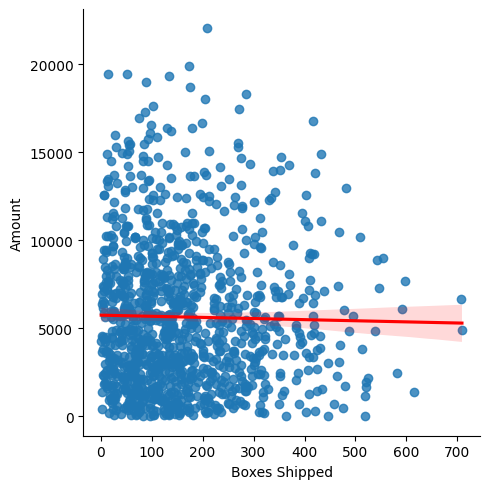

In [ ]:
sns.lmplot(data=df, x='Boxes Shipped', y='Amount', line_kws={'color':'red'})

### Koreliacijos šilumos žemėlapis / Correlation Heatmap

+1 rodo teigiamą koreliaciją, t.y., jeigu Boxes Shipped auga, ir Amount taip pat auga tokiu tempu.  
-0.019 rodo silpną neigiamą korelaciją, t.y. kai padaugėja išsiųstų dėžių, pardavimų suma turi tendenciją šiek tiek mažėti. Tačiau šis ryšys yra labai silpnas.  
Iš šių rezultatų galima daryti išvadą, kad didesnis dėžių kiekis nebūtinai reiškia brangesnį pardavimą (tikėtina, kad taikomos nuolaidos didesniam kiekiui arba perkami akcijiniai produktai).  

/ +1 indicates a strong positive correlation, meaning that as the number of Boxes Shipped increases, the Amount tends to increase at the same rate.  
-0.019 indicates a very weak negative correlation, meaning that when more boxes are shipped, the total sales amount tends to slightly decrease. However, this relationship is extremely weak.  
These results suggest that a higher number of boxes does not necessarily indicate a higher-value sale — likely due to discounts on larger quantities or purchases of promotional items.

<Axes: >

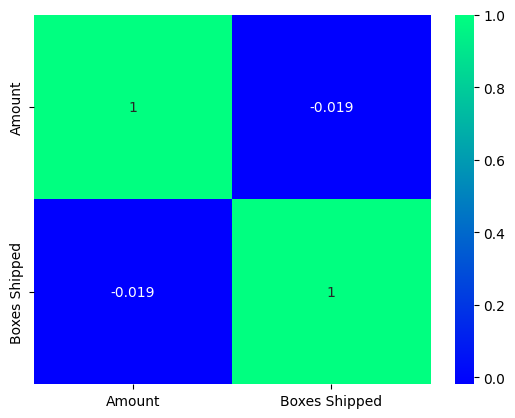

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='winter')

### Sklaidos diagrama / Scatter plot

Diagrama rodo, kad daugiausiai parduotų prekių, siekiančių iki $10 000, yra atlikta pristatant nuo 1-300 dėžių. Kiti pardavimai jau yra pavieniai, retesni.  

/ The chart shows that the majority of sold goods, totaling up to $10,000, were delivered in batches of 1 to 300 boxes. Other sales are more sporadic and less frequent.

<Axes: xlabel='Boxes Shipped', ylabel='Amount'>

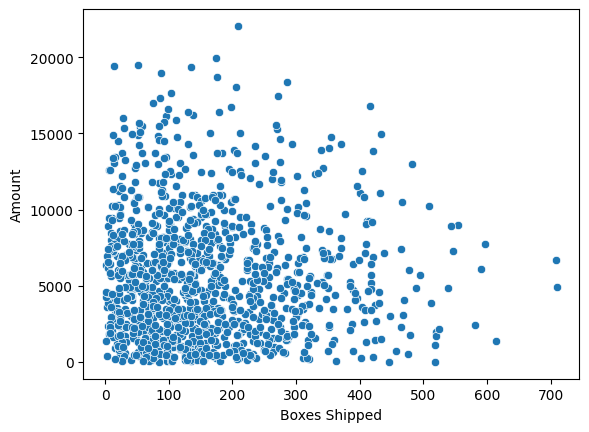

In [ ]:
sns.scatterplot(data=df, x='Boxes Shipped', y='Amount')

### Stulpelinė diagrama: Mėnesio pardavimai / Bar chart: Chocolate Sales by Month

Siekiau išsiaiškinti, kada būna šokolado pirkimo pikas.  
Diagrama parodė, kad daugiausiai šokolado ($896 105) žmonės pirko 2022-01, taip pat 2022-06 ($865 144), o mažiausiai - 2022-04 ($674 051).  
Sausio mėn. yra laikomas depresyviausiu metų mėnesiu. Turimi šokolado pardavimo rezultatai rodo, kad sausio mėnesį šio saldumyno yra suvalgoma daugiausiai.  

/ I sought to determine when the peak period for chocolate purchases occurs.  
The chart revealed that the highest volume of chocolate sales occurred in January 2022, amounting to $896,105, followed by June 2022 with $865,144, while the lowest sales were recorded in April 2022, totaling $674,051.  
January is considered the most depressive month of the year. The available chocolate sales data indicate that consumption of this confectionery is highest during January.

In [ ]:
df['YearMonth'] = df['Date'].dt.to_period('M').astype(str)
monthly_totals = df.groupby('YearMonth')['Amount'].sum().sort_values(ascending=False)


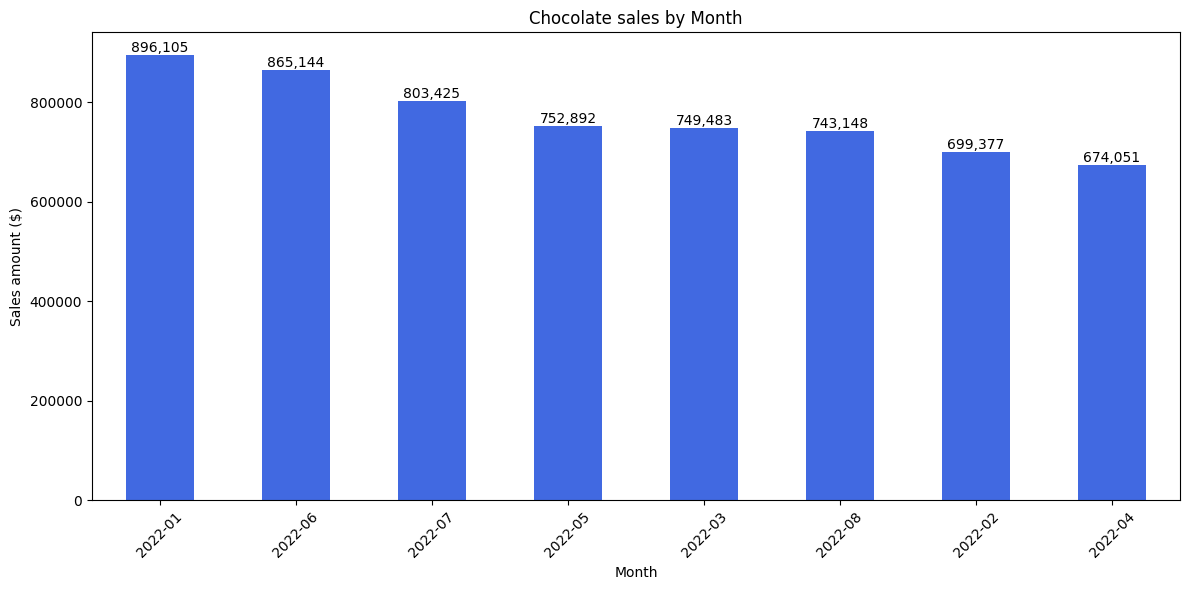

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
ax = monthly_totals.plot(kind='bar', color='royalblue')
for i, value in enumerate(monthly_totals):
    ax.text(i, value + 10,  
            f'{value:,.0f}',  
            ha='center', va='bottom', fontsize=10, color='black')

plt.title('Chocolate sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales amount ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Siekiau didinti pardavimus, tad išsiaiškinau kurioje šalyje yra parduodama daugiausiai šokolado.  
Susumavau kiek parduota šokolado pagal šalis.  

/ In order to increase sales, I analyzed which country has the highest chocolate sales.  
I aggregated the total chocolate sales data by country.

In [ ]:
country_totals = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)

### Stulpelinė diagrama: Metų pardavimai / Bar chart: Chocolate Sales by Country

Parengiau diagramą, kurioje matome, kad daugiausiai šokolado yra parduota Australijoje, taip pat daug parduota JK, Indijoje bei JAV.  

/ I prepared a chart showing that the highest chocolate sales occurred in Australia, with significant sales also recorded in the UK, India, and the USA.

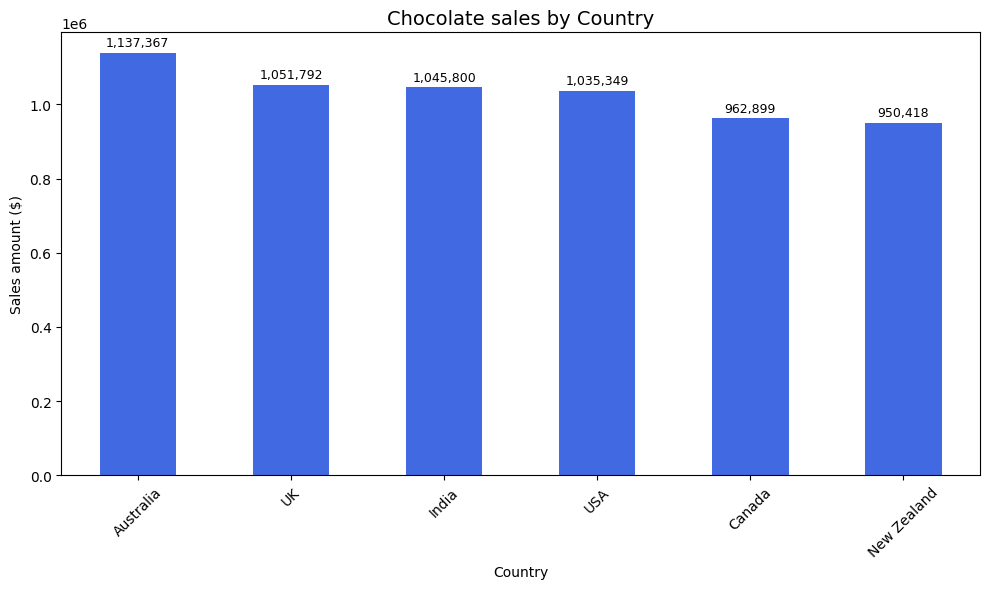

In [ ]:
plt.figure(figsize=(10, 6))
ax = country_totals.plot(kind='bar', color='royalblue')
for i, value in enumerate(country_totals):
    ax.text(i, value + (value * 0.01),  
            f'{value:,.0f}',            
            ha='center', va='bottom', fontsize=9)

plt.title('Chocolate sales by Country', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Sales amount ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Prognozinis modelis / Predictive model

Remdamasi turimais 2022 m. pardavimų duomenimis, siekiau prognozuoti, kokie šokolado pardavimai bus 2026 m.  
Taikiau fiksuotą metinį augimo procentą (12 %).  

/ Based on the available sales data from 2022, I aimed to forecast chocolate sales for 2026.  
I applied a fixed annual growth rate of 12%.

In [ ]:
data = {
    'Country': ['Australia', 'UK', 'India', 'USA', 'Canada', 'New Zealand'],
    'Sales_2022': [1137367, 1051792, 1045800, 1035349, 962899, 950418]  
}

df = pd.DataFrame(data)

augimo_procentas = 12  

df['Sales_2026'] = df['Sales_2022'] * (1 + augimo_procentas / 100)

df = df.sort_values(by='Sales_2026', ascending=False).reset_index(drop=True)

df.index += 1
df.index.name = 'No.'

print(df)


         Country  Sales_2022  Sales_2026
No.                                     
1      Australia     1137367  1273851.04
2             UK     1051792  1178007.04
3          India     1045800  1171296.00
4            USA     1035349  1159590.88
5         Canada      962899  1078446.88
6    New Zealand      950418  1064468.16


Nors gautas padidėjimo rezultatas per 4 metus yra gan reikšmingas, tačiau jis nėra ženkliai didelis (nuo $100 tūkst. iki $145 tūkst.), tad siekiu ieškoti daugiau galimybių kaip padidinti pardavimus.  

/ Although the projected increase over four years is quite significant, it is not substantially large (from $100,000 to $145,000), so I aim to explore additional opportunities to boost sales.

### Sausio mėnuo pasaulyje

Moksliniai tyrimai rodo, kad dėl mažo saulės kiekio žiemos mėnesiais sumažėja serotonino lygis smegenyse. Dėl to gali kilti depresijos ar nuotaikos svyravimų rizika.  
Sausio mėnesį žmonės išgyvena žiemos depresiją (Seasonal Affective Disorder), sausio „mėlynojo pirmadienio“ fenomeną (Blue Monday), pokalėdinį emocinį nuosmukį (post-holiday blues).  

Moksliniai tyrimai taip pat rodo, kad valgant šokoladą, žmogaus organizme suaktyvėja serotonino gamyba bei dopamino išsiskyrimas. Tad patiriant depresiją šis saldymunas yra  
dažniau perkamas ir vartojamas negu kitais atvejais.  

Remdamasi gautais rezultatais, galiu daryti išvadą, kad Šiaurės pusrutulyje (JK, JAV, Kanada, Indija) šokolado pikas gali būti siejamas dėl tamsos,  
o Pietų pusrutulis (Australija, Naujoji Zelandija) yra susijęs su kultūriniu, sezoniniu bei socialiniu kontekstu  - moksleivių ir studentų atostogų metas,  
vasaros atostogų pikas, daugybė švenčių ir socialinių renginių, dar vyksta pokalėdiniai išpardavimai, dovanų keitimai, turistai perka šokoladą kaip lauktuves ar užkandžius,  
taip pat daugelis kompanijų specialiai sausį taiko nuolaidas ar sezonines kampanijas.  

Remdamasi 2022 m. 8 mėnesių duomenimis, siekiau išsiaiškinti, kuriose dar šalyse yra padidėjęs žmonių sergamumas depresija (naudojau 1990 - 2019 m. tyrimus).  
Tikėtina, kad gauti rezultatai atitinkamai pagelbėtų ir nuo depresijos kenčiantiems žmonėms, ir kartu padidintų pardavimus, tikslingai išplėstų perkančių šalių sąrašą.  

Gavau 20 šalių sąrašą, kuriame matyti, kad didžiausias depresijos paplitimas fiksuojamas tokiose šalyse kaip Grenlandija, Marokas, Lesotas, Uganda, Suomija, Iranas ir kt.

/ Scientific studies show that due to low sunlight exposure during the winter months, serotonin levels in the brain decrease. This can increase the risk of depression and mood fluctuations.  
In January, people often experience winter depression (Seasonal Affective Disorder), the “Blue Monday” phenomenon, and post-holiday emotional lows (post-holiday blues).  

Research also indicates that eating chocolate stimulates serotonin production and dopamine release in the human body. Therefore, during periods of depression,  
this sweet treat tends to be purchased and consumed more frequently than usual.  

Based on the results obtained, I can conclude that in the Northern Hemisphere (UK, USA, Canada, India), the peak in chocolate sales may be related to darkness,  
whereas in the Southern Hemisphere (Australia, New Zealand) it is associated with cultural, seasonal, and social contexts—such as school and university holidays,  
the summer vacation peak, numerous holidays and social events, ongoing post-holiday sales, gift exchanges, tourists buying chocolate as souvenirs or snacks,  
and many companies offering special January discounts or seasonal campaigns.  

Using eight months of 2022 data, I sought to identify other countries with increased depression prevalence (drawing on studies from 1990 to 2019).  
The obtained results are likely to help both individuals suffering from depression and contribute to increasing sales by strategically expanding the list of purchasing countries.  

I compiled a list of 20 countries, where the highest depression rates are recorded in countries such as Greenland, Morocco, Lesotho, Uganda, Finland, Iran, among others.

In [ ]:
df = pd.read_csv(r'C:\Users\Grete\Documents\PYTHON\BAIGIAMASIS_DARBAS\Mental health Depression disorder Data.csv')
df = df.dropna(subset=['Depression (%)'])

sum_depression = df.groupby('Entity')['Depression (%)'].sum().sort_values(ascending=False)

sum_depression_df = sum_depression.reset_index()
sum_depression_df.index = range(1, len(sum_depression_df) + 1)  

print(sum_depression_df.head(20))


                      Entity  Depression (%)
1                  Greenland      180.855049
2                    Morocco      157.088335
3                    Lesotho      151.866706
4                     Uganda      146.378866
5                    Finland      145.126245
6                       Iran      136.481313
7                  Palestine      134.913231
8                  Australia      134.273622
9              United States      132.850339
10                  Portugal      131.574281
11               Australasia      131.025927
12             North America      130.895089
13                    Sweden      128.211438
14                    France      122.565200
15                   Ukraine      121.108902
16                   Ireland      120.276495
17          Northern Ireland      120.039474
18                 Lithuania      119.883279
19                   Estonia      119.404734
20  Central African Republic      118.547230


C:\Users\Grete\AppData\Local\Temp\ipykernel_2440\4268870219.py:1: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\Grete\Documents\PYTHON\BAIGIAMASIS_DARBAS\Mental health Depression disorder Data.csv')


In [3]:
pip install lxml

   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   -- ------------------------------------- 0.3/3.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.5/3.8 MB 1.4 MB/s eta 0:00:03
   -------- ------------------------------- 0.8/3.8 MB 1.5 MB/s eta 0:00:03
   ------------- -------------------------- 1.3/3.8 MB 1.6 MB/s eta 0:00:02
   ------------------- -------------------- 1.8/3.8 MB 1.8 MB/s eta 0:00:02
   ------------------------ --------------- 2.4/3.8 MB 2.0 MB/s eta 0:00:01
   ------------------------------ --------- 2.9/3.8 MB 2.0 MB/s eta 0:00:01
   ----------------------------------- ---- 3.4/3.8 MB 2.1 MB/s eta 0:00:01
   -------------------------------------- - 3.7/3.8 MB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 3.8/3.8 MB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Sąraše panaikinau šalis, kurios jau aktyviai perka šokoladą (Australija, JK, Indija, JAV, Naujoji Zelandija) bei sugrupavau šalis pagal didžiausią perkamąją galią.  
Remdamasi moksline statistika, kad ~60 proc. žmonių perka ir valgo šokoladą, bandžiau prognozuoti, kad galime pasiekti 192,677,101 potencialių pirkėjų skaičių.  
Gautas naujų 15 šalių rezultatas parodė, kad rinkodariniai veiksmai labiausiai turėtų būti nukreipti į tokias šalis kaip Iranas (pasikeitus geopolitinei situacijai),  
Prancūzija, Uganda, Marokas, Ukraina (pasikeitus geopolitinei situacijai), Portugalija, Švedija ir kt.  

/ I removed countries from the list that are already active chocolate consumers (Australia, UK, India, USA, New Zealand) and grouped the remaining countries by their highest purchasing power.  
Based on scientific statistics indicating that approximately 60% of people buy and consume chocolate, I attempted to forecast that we could reach a potential customer base of 192,677,101 individuals.  
The results for the new list of 15 countries showed that marketing efforts should primarily target countries such as Iran (contingent on geopolitical changes), France, Uganda, Morocco,  
Ukraine (contingent on geopolitical changes), Portugal, Sweden, and others.

In [ ]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population')[0][['Location', 'Population']]

salys = [
    'Iran',
    'France',
    'Uganda',
    'Morocco',
    'Ukraine',
    'Portugal',
    'Sweden',
    'Central African Republic',
    'Finland',
    'Palestine',
    'Ireland',
    'Lithuania',
    'Lesotho',
    'Estonia',
    'Greenland (Denmark)'
]

atrinktos_salys = df[df['Location'].isin(salys)].reset_index(drop=True)
atrinktos_salys.index += 1

atrinktos_salys['60% of the Population'] = atrinktos_salys['Population'] * 0.6

bendra_gyventoju_suma = atrinktos_salys['Population'].sum()
sesiadesimt_proc_suma = atrinktos_salys['60% of the Population'].sum()

display(atrinktos_salys)
print('Total population sum: {:,}'.format(bendra_gyventoju_suma))
print('60% of the population sum: {:,}'.format(int(sesiadesimt_proc_suma)))


,Location,Population,60% of the Population
1,Iran,85961000,51576600.0
2,France,68633000,41179800.0
3,Uganda,45905417,27543250.2
4,Morocco,36828330,22096998.0
5,Ukraine,32862000,19717200.0
6,Portugal,10749635,6449781.0
7,Sweden,10588818,6353290.8
8,Central African Republic,6470307,3882184.2
9,Finland,5641532,3384919.2
10,Palestine,5483450,3290070.0


Total population sum: 321,128,503
60% of the population sum: 192,677,101


### Išvados / Conclusions 

Atlikus analizę, matome, kad:

1. Bendra šokolado pardavimo apimtis 2022 m. sausio-rugpūčio mėn. siekė $6,183,625, buvo įvykdyti 1094 užsakymai, pristatyta virš 177 000 dėžių. Populiariausi produktai – Dark Bites, Eclairs, White Choc ir kt.  
2. Ryšys tarp parduotų dėžių skaičiaus ir sumos yra silpnas – daugiau dėžių dažnai nereiškia didesnės pardavimo sumos. Tikėtina, taikomos nuolaidos didesniems kiekiams.  
3. Koreliacijos analizė patvirtina labai silpną neigiamą ryšį tarp dėžių kiekio ir pardavimų sumos – tai rodo, kad pelningesni gali būti mažesni, bet brangesni užsakymai.  
4. Pirkimo pikas fiksuojamas sausį – pardavimai šiuo metu yra didžiausi. Tai gali būti susiję su žiemos depresija, emociniu nuosmukiu ir serotonino stoka Šiaurės pusrutulyje.  
5. Daugiausiai šokolado parduota Australijoje, JK, Indijoje ir JAV – šios šalys dominuoja pagal apimtį ir gali būti toliau plėtojamos.  
6. Prognozė 2026 m. parodė, kad taikant 12 % metinį augimą, visų šalių pardavimai išaugtų gana reikšmingai ir tai leidžia planuoti strateginį augimą,  
tačiau pats pokytis nėra ženkliai didelis, tad reikia ieškoti naujų rinkų.
7. Remiantis depresijos paplitimu pasaulyje (1990–2019) ir atmetus jau aktyvias rinkas, nustatytos 15 potencialių naujų šalių, kuriose šokoladas galėtų padėti žmonėms išgyvenantiems depresiją, o kompanijai - padidintų pardavimus.  
8. Potenciali auditorija – virš 192 mln. žmonių, remiantis 60 % gyventojų, kurie tikėtina vartoja šokoladą. Tai rodo didelį neišnaudotą rinkos potencialą.  

After conducting the analysis, we observe that:  
1. The total chocolate sales volume from January to August 2022 reached $6,183,625, with 1,094 orders fulfilled and over 177,000 boxes delivered. The most popular products were Dark Bites, Eclairs, White Choc, among others.  
2. The correlation between the number of boxes sold and the total sales amount is weak — a higher number of boxes does not necessarily mean higher sales revenue. It is likely that discounts are applied for larger quantities.  
3. Correlation analysis confirms a very weak negative relationship between the number of boxes and sales amount, indicating that smaller but more expensive orders may be more profitable.  
4. The peak purchasing period occurs in January — sales are highest at this time. This may be linked to winter depression, emotional lows, and serotonin deficiency in the Northern Hemisphere.  
5. The largest chocolate sales were recorded in Australia, the UK, India, and the USA — these countries dominate in volume and could be further developed.  
6. The forecast for 2026 shows that applying a 12% annual growth rate would result in a significant increase in sales across all countries, enabling strategic growth planning; however, the change itself is not substantial, so new markets need to be explored.  
7. Based on global depression prevalence (1990–2019) and excluding already active markets, 15 potential new countries were identified where chocolate could help people suffering from depression while also increasing company sales.  
8. The potential audience exceeds 192 million people, based on the assumption that 60% of the population likely consumes chocolate. This indicates a large untapped market potential.